**Import Libraries**

In [2]:
# Utsav Anantbhat
# 301446421
# CMPT353 - E7

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as py_stats
import numpy as np
import re
from scipy.stats import linregress
from datetime import datetime

**Loading Data**

In [3]:
# Load the data from the CSV into a DataFrame.
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])
data['created_at'] = pd.to_datetime(data['created_at'], format='ISO8601')
#print(data) 

**Dog Rates Significance**

1.5000503986105543e-08 -10.585967528906664


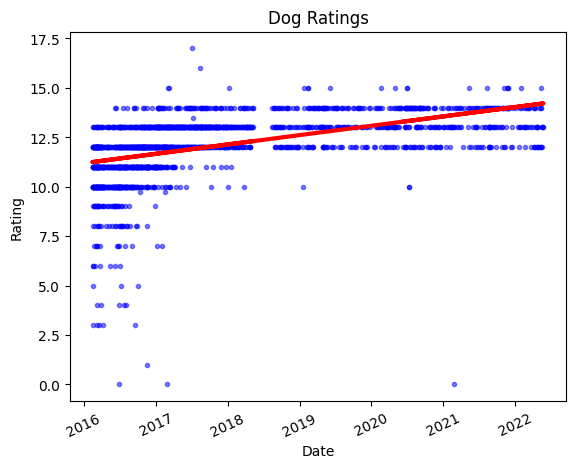

In [4]:
# Find tweets that contain an “n/10” rating (because not all do). 
# Extract the numeric rating. Exclude tweets that don't contain a rating.
tweet_rating_ex = r'(\d+(\.\d+)?)/10' #Regular expression
#tweet_text = data['text']
data['rating'] = data['text'].str.extract(tweet_rating_ex)[0]
#dog_ratings = data['rating']

# Remove outliers: there are a few obvious ones. 
# Exclude rating values that are too large to make sense. (Maybe larger than 25/10?)
data['rating'] = pd.to_numeric(data['rating'])
data = data[data['rating'] <= 25]

data['timestamp'] = data['created_at'].apply(lambda x: x.timestamp())

linear_fit = py_stats.linregress(data['timestamp'], data['rating'])

data['prediction'] = data['timestamp'] * linear_fit.slope + linear_fit.intercept
data.reset_index().drop(['index'], axis=1)

print(linear_fit.slope, linear_fit.intercept)

plt.title("Dog Ratings")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()

Text(0.5, 0, 'Residuals')

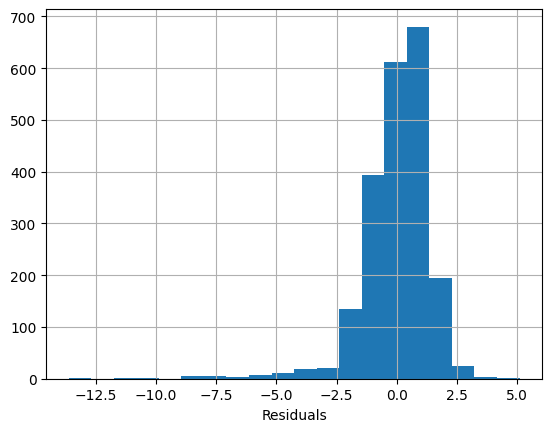

In [5]:
data['residuals'] = data['rating'] - data['prediction']

data['residuals'].hist(bins=20)
plt.xlabel('Residuals')

In [6]:
linear_fit.pvalue

2.607038813966516e-127

## E12 Visualization

1.5000503986105543e-08 -10.585967528906664


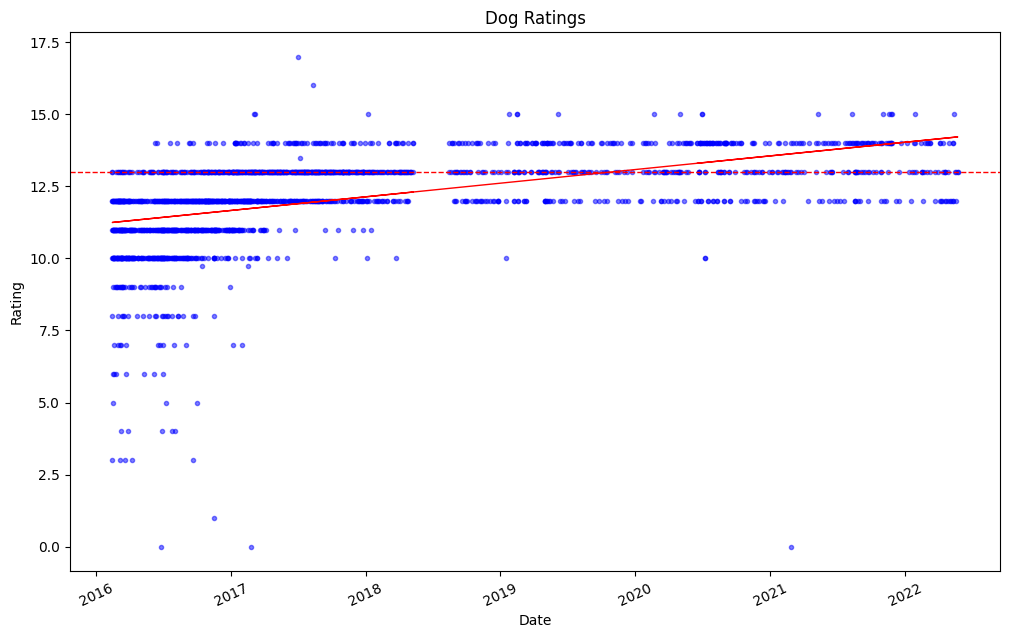

In [9]:
# Find tweets that contain an “n/10” rating (because not all do). 
# Extract the numeric rating. Exclude tweets that don't contain a rating.
tweet_rating_ex = r'(\d+(\.\d+)?)/10' #Regular expression
#tweet_text = data['text']
data['rating'] = data['text'].str.extract(tweet_rating_ex)[0]
#dog_ratings = data['rating']

# Remove outliers: there are a few obvious ones. 
# Exclude rating values that are too large to make sense. (Maybe larger than 25/10?)
data['rating'] = pd.to_numeric(data['rating'])
data = data[data['rating'] <= 25]

data['timestamp'] = data['created_at'].apply(lambda x: x.timestamp())

linear_fit = py_stats.linregress(data['timestamp'], data['rating'])

data['prediction'] = data['timestamp'] * linear_fit.slope + linear_fit.intercept
data.reset_index().drop(['index'], axis=1)

print(linear_fit.slope, linear_fit.intercept)

plt.figure(figsize=(12,7))
plt.title("Dog Ratings")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=1)
plt.axhline(y=13, color="red", linestyle="--", linewidth=1)
plt.savefig("dog-ratings-e7.png")
plt.show()